In [1]:
#--- imports
from qiskit import *
import numpy as np
import random
from qiskit.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor

In [2]:
#--- this function creates a random balanced list with +1 and -1
def RandomBalancedList(number_of_qubits):
    deutsch_list = [(-1)**(i) for i in range(2**(number_of_qubits))]
    random.shuffle(deutsch_list)
    return deutsch_list

#--- this function transforms the previous list into an oracle circuit
def OracleCircuit(oracle_array,number_of_qubits):
    qreg = QuantumRegister(number_of_qubits)
    qc_oracle = QuantumCircuit(qreg,name='Deutsch-Jozsa Oracle')
    qc_oracle.diagonal(oracle_array,qreg)
    qc_oracle = transpile(qc_oracle,basis_gates=['cx','u3'],optimization_level=3)
    return qc_oracle

#--- here we create the deutsch-jozsa circuit: oracle + hadamard transform
def DeutschCircuit(qc_oracle,number_of_qubits):
    qc_deutsch = QuantumCircuit(number_of_qubits,number_of_qubits)
    qc_deutsch.h(range(number_of_qubits))
    qc_deutsch.append(qc_oracle,range(number_of_qubits))
    qc_deutsch.h(range(number_of_qubits))
    qc_deutsch.measure(range(number_of_qubits),range(number_of_qubits))
    return qc_deutsch

#--- running with qasm simulator
def QasmRunning(qc_deutsch):
    backend = Aer.get_backend('qasm_simulator')
    result = execute(qc_deutsch,backend).result().get_counts()
    return result

#--- running on real backends
def RealRunning(qc_deutsch,backend_str):
    IBMQ.load_account()
    provider = IBMQ.get_provider(group='open')
    backend = provider.get_backend(backend_str)
    job = execute(qc_deutsch, backend=backend)
    display(job_monitor(job))
    result = job.result().get_counts()
    return result

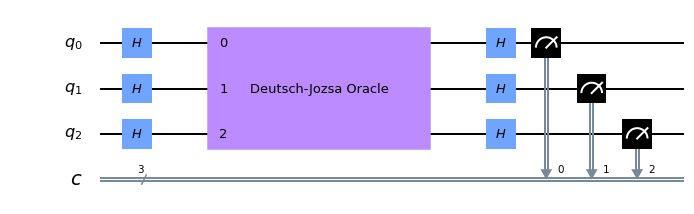

In [3]:
#--- setting up and creating the circuit
number_of_qubits = 3
oracle_list = RandomBalancedList(number_of_qubits)
qc_oracle = OracleCircuit(oracle_list,number_of_qubits)
qc_deutsch = DeutschCircuit(qc_oracle,number_of_qubits)
display(qc_deutsch.draw())

In [4]:
oracle_list

[-1, -1, 1, -1, 1, 1, -1, 1]

Job Status: job has successfully run


None

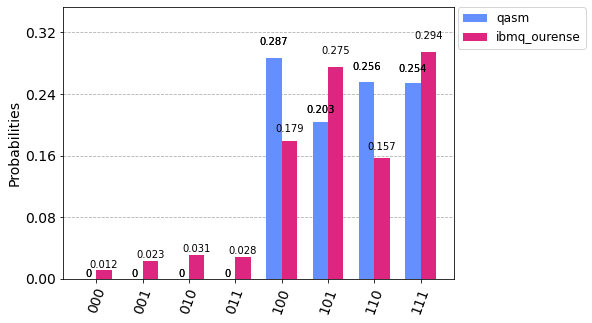

In [5]:
#--- running the circuit with qasm simulator and ibm backend
result_qasm = QasmRunning(qc_deutsch)
result_ibm = RealRunning(qc_deutsch,'ibmq_ourense')
plot_histogram([result_qasm,result_ibm],legend=['qasm','ibmq_ourense'])